In [1]:
print("Heart Disease Predition Model")

Heart Disease Predition Model


In [2]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [3]:
df = pd.read_csv(r"C:/Users/Dell/Desktop/Coding/Internship/Data Files/framingham.csv")
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.tail(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
xa = df.drop(['TenYearCHD'],axis = 'columns')
y = df.TenYearCHD

In [11]:
from sklearn.preprocessing import StandardScaler

#List of all the numerical columns
numerical_columns = xa.select_dtypes(include=['float', 'int']).columns

#Initializing the StandarScaler
scaler = StandardScaler()

#Fit and transform the numerical columns
xa[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [12]:
xa.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03
mean,3.107896e-17,-2.253225e-16,-2.330922e-17,-4.273357e-17,3.302140e-17,6.992766e-17,-5.827305e-18,-2.719409e-17,1.748192e-17,-2.680560e-16,-6.264353e-16,2.058981e-16,2.408619e-16,-1.204310e-16,-1.359705e-16
std,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00
min,-8.930526e-01,-2.050255e+00,-9.587302e-01,-9.783641e-01,-7.571689e-01,-1.769012e-01,-7.598677e-02,-6.728598e-01,-1.667837e-01,-2.808870e+00,-2.212955e+00,-2.916407e+00,-2.519727e+00,-2.648667e+00,-1.751103e+00
25%,-8.930526e-01,-8.821476e-01,-9.587302e-01,-9.783641e-01,-7.571689e-01,-1.769012e-01,-7.598677e-02,-6.728598e-01,-1.667837e-01,-6.996275e-01,-6.960091e-01,-6.612613e-01,-6.648886e-01,-6.453088e-01,-4.540803e-01
50%,-8.930526e-01,-6.447261e-02,1.924946e-02,-9.783641e-01,-7.571689e-01,-1.769012e-01,-7.598677e-02,-6.728598e-01,-1.667837e-01,-6.458662e-02,-1.979074e-01,-7.659402e-02,-9.908921e-02,-6.099616e-02,-1.612042e-01
75%,1.119755e+00,7.532023e-01,9.972291e-01,1.022114e+00,9.206890e-01,-1.769012e-01,-7.598677e-02,1.486194e+00,-1.667837e-01,5.931342e-01,5.209438e-01,5.915972e-01,5.546551e-01,5.233165e-01,2.153507e-01
max,1.119755e+00,2.388552e+00,1.975209e+00,1.022114e+00,5.115334e+00,5.652871e+00,1.316019e+01,1.486194e+00,5.995790e+00,8.236304e+00,7.364181e+00,4.976602e+00,7.630223e+00,5.615184e+00,1.306006e+01


<Axes: >

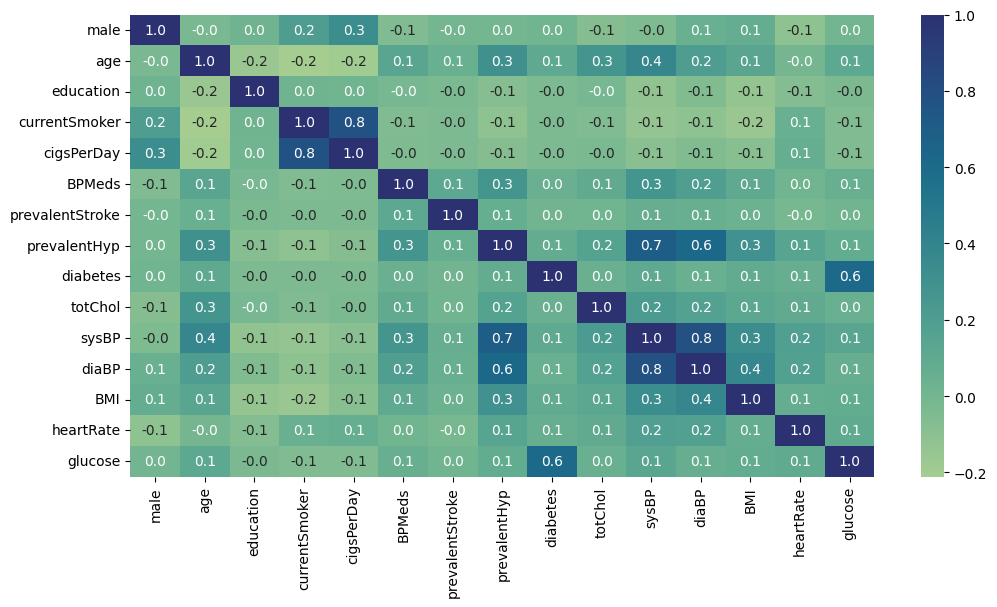

In [13]:
corr = xa.select_dtypes("number").corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True, fmt = '.1f' , cmap = 'crest')

In [14]:
xa = xa.drop(columns = ['currentSmoker','diabetes','sysBP'])

<Axes: >

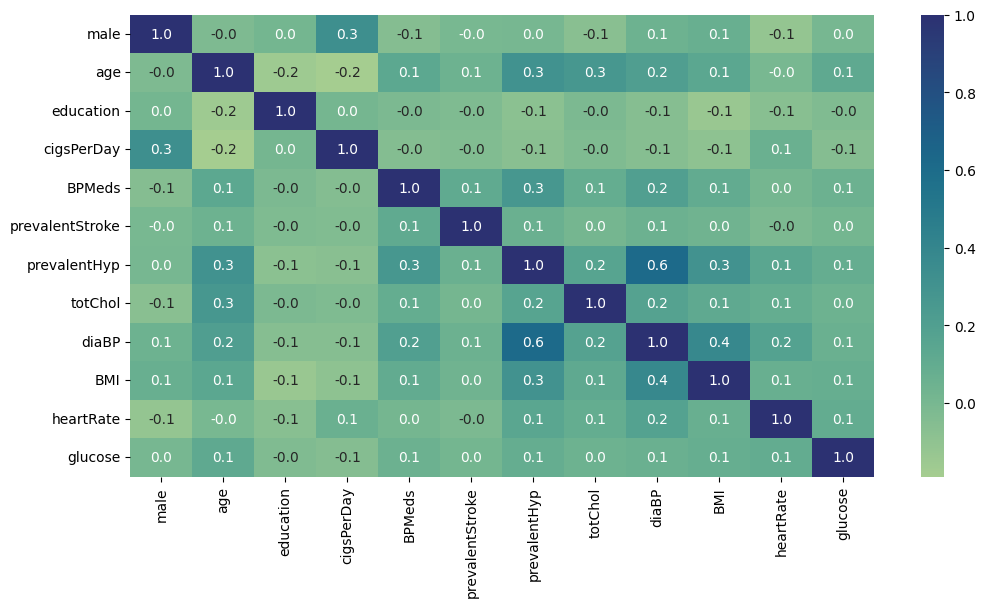

In [15]:
corr = xa.select_dtypes("number").corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot = True, fmt = '.1f' , cmap = 'crest')

In [16]:
# We check in the df how many people are going to have Cardiac problem in 10 years | 0 means No and 1 means Yes
df['TenYearCHD'].value_counts()

TenYearCHD
0    3101
1     557
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

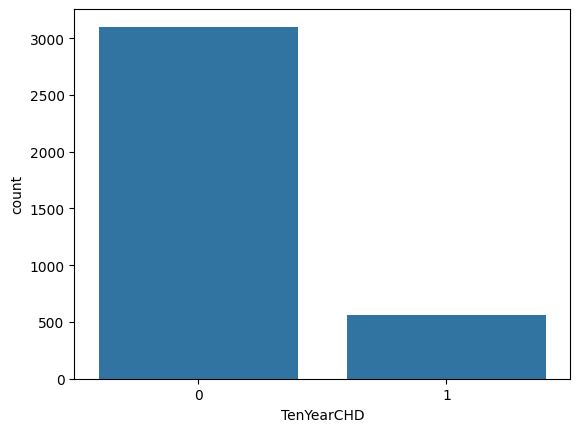

In [17]:
#Visualizing TenyearCHD values
sns.countplot(x = 'TenYearCHD', data = df)

In [18]:
# We have to split the data into the training data and testing data using an inbuilt function
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xa,y,test_size = 0.2, random_state = 42)

In [19]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

model = make_pipeline(
    LogisticRegression())
model.fit(x_train, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression())])

In [20]:
model.score(x_test, y_test)

0.8456284153005464

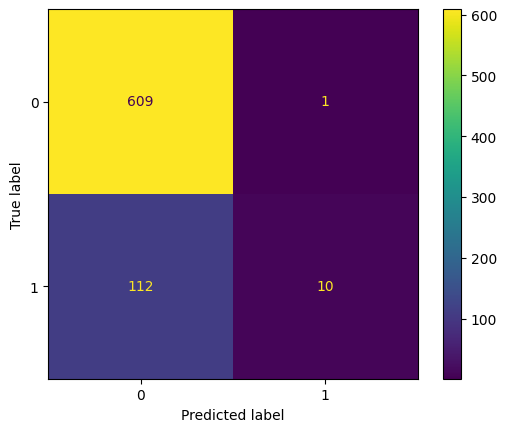

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test);

In [22]:
probabilities = model.predict_proba(x_test)[:,1]
default_predictions = (probabilities > 0.5).astype(int)
default_cm = confusion_matrix(y_test, default_predictions)
print("Confusion Matrix (Default Threshold 0.5) :")
print(default_cm)

adjusted_threshold = 0.6
adjusted_predictions = (probabilities > adjusted_threshold).astype(int)
adjusted_cm = confusion_matrix(y_test, adjusted_predictions)
print("Confusion Matrix (Adjusted Threshold 0.6) :")
print(adjusted_cm)

Confusion Matrix (Default Threshold 0.5) :
[[609   1]
 [112  10]]
Confusion Matrix (Adjusted Threshold 0.6) :
[[610   0]
 [117   5]]


In [23]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [24]:
def make_prediction(male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,diaBP,BMI,heartRate,glucose):
    data={
        'male':male,
        'age':age,
        'education':education,
        'cigsPerDay':cigsPerDay,
        'BPMeds':BPMeds,
        'prevalentStroke':prevalentStroke,
        'prevalentHyp':prevalentHyp,
        'totChol':totChol,
        'diaBP':diaBP,
        'BMI':BMI,
        'heartRate':heartRate,
        'glucose':glucose
    }
    df = pd.DataFrame(data, index=[0])

    prediction = model.predict(df)
    return f"Disease in 10 years: {prediction}"

In [25]:
interact(
    make_prediction,
    male = Dropdown(options = [0,1]),
    age = IntSlider(min = 0, max = 100),
    education = Dropdown(options = [0,1,2,3,4]),
    cigsPerDay = IntSlider(min = 0, max = 100),
    BPMeds = Dropdown(options = [0,1]),
    prevalentStroke = Dropdown(options = [0,1]),
    prevalentHyp = Dropdown(options = [0,1]),
    totChol = IntSlider(min = 0, max = 100),
    diaBP = IntSlider(min = 0, max = 100),
    BMI = IntSlider(min = 0, max = 100),
    heartRate = IntSlider(min = 0, max = 100),
    glucose = IntSlider(min = 0, max = 100)
);

interactive(children=(Dropdown(description='male', options=(0, 1), value=0), IntSlider(value=0, description='a…